In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from vega_datasets import data

### sf_temps Dataset

In [2]:
df = data.sf_temps()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df.head(2)

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00


In [5]:
#set index
df.set_index('date',inplace=True)
df.sort_index(inplace=True)

In [6]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:xlabel='date'>

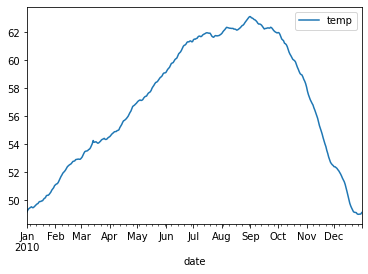

In [7]:
#Resample by the day and take the average temperature. 
#Visualize the average temperature over time.
daily = df.resample('d').mean()
daily.plot()

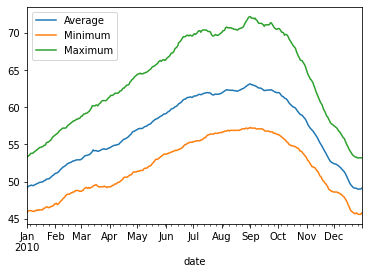

In [8]:
# plt.figure();
df.temp.resample('d').mean().plot(label='Average')
#- Write the code necessary to visualize the minimum temperature over time.
df.temp.resample('d').min().plot(label='Minimum')
#- Write the code necessary to visualize the maximum temperature over time.
df.temp.resample('d').max().plot(label='Maximum')
plt.legend()
plt.show()

In [9]:
#- Which month is the coldest, on average?  JANUARY
df.resample('M').mean().sort_values(by='temp')

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


In [10]:
#- Which month has the highest average temperature? SEPTEMBER
df.resample('M').mean().sort_values(by='temp',ascending=False)

,temp
date,
2010-09-30,62.487083
2010-08-31,62.405376
2010-07-31,61.765457
2010-06-30,60.444722
2010-10-31,60.253091
2010-05-31,57.970968
2010-04-30,55.633056
2010-11-30,55.185139
2010-03-31,53.956528


In [11]:
#- Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
#Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
minmax = df.resample('d').agg(['min','max'])

In [12]:
#create diff column
minmax['temp','diff'] = minmax['temp','max'] - minmax['temp','min']

In [13]:
monthly_diff = minmax['temp','diff'].resample('M').mean()


In [14]:
monthly_diff.sort_values(ascending=False) 
#SEPTEMBER has biggest monthly temp difference - interpretted as avg diff per month

date
2010-09-30    14.403333
2010-07-31    13.977419
2010-06-30    13.950000
2010-08-31    13.870968
2010-10-31    13.432258
2010-05-31    12.909677
2010-04-30    12.320000
2010-03-31    10.854839
2010-11-30    10.236667
2010-02-28     9.485714
2010-01-31     8.341935
2010-12-31     7.925806
Name: (temp, diff), dtype: float64

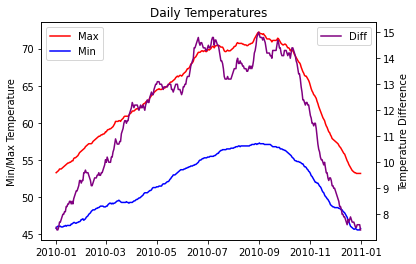

In [15]:
#- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.
fig, ax = plt.subplots()
ax.plot(minmax['temp','max'],color='red',label='Max')
ax.plot(minmax['temp','min'],color='blue',label='Min')
ax.legend(loc=2)
ax.set_ylabel('Min/Max Temperature')
ax2 = ax.twinx()
ax2.plot(minmax['temp','diff'],color='purple',label='Diff')
plt.title("Daily Temperatures")
ax2.set_ylabel('Temperature Difference')
ax2.legend(loc=1)
plt.show()

### Seattle Weather dataset

In [16]:
df = data.seattle_weather()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [17]:
df.set_index('date',inplace=True)

In [18]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
#Which year and month combination has the highest amount of precipitation?
df.precipitation.resample('m').sum().nlargest(n=1)

date
2015-12-31    284.5
Freq: M, Name: precipitation, dtype: float64

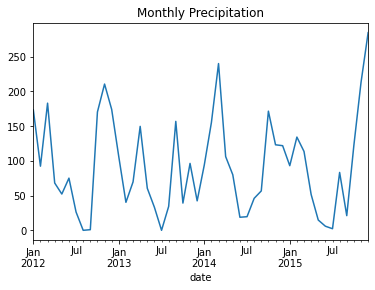

In [20]:
#Visualize the amount of monthly precipitation over time.
df.precipitation.resample('m').sum().plot(title = "Monthly Precipitation");

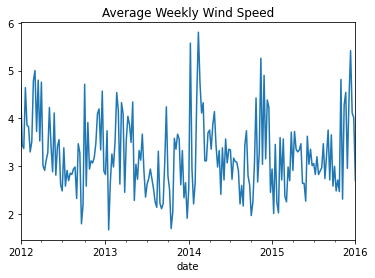

In [21]:
#Visualize the amount of wind over time. Choose a time interval you think is appropriate.
df.wind.resample('w').mean().plot(title = "Average Weekly Wind Speed");

In [22]:
#Which year-month combination is the windiest?
df.wind.resample('m').mean().nlargest(1)

date
2014-02-28    4.528571
Freq: M, Name: wind, dtype: float64

In [23]:
#What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
sunny = df[df.weather == 'sun']
sunny.weather.resample('y').count().nlargest(1)

date
2014-12-31    211
Freq: A-DEC, Name: weather, dtype: int64

In [24]:
df.weather.str.contains('sun').resample('y').sum().nlargest(1)

date
2014-12-31    211
Freq: A-DEC, Name: weather, dtype: int64

In [25]:
df.weather.str.contains('sun')

date
2012-01-01    False
2012-01-02    False
2012-01-03    False
2012-01-04    False
2012-01-05    False
              ...  
2015-12-27    False
2015-12-28    False
2015-12-29    False
2015-12-30     True
2015-12-31     True
Name: weather, Length: 1461, dtype: bool

In [26]:
#In which month does it rain the most? TOTALLY  WRONG
df.precipitation.resample('m').sum().nlargest(1)

date
2015-12-31    284.5
Freq: M, Name: precipitation, dtype: float64

In [27]:
#interpretted as months with rainy days
rainy = df[df.weather == 'rain']
rainy.weather.resample('m').count().nlargest(1)

date
2012-11-30    25
Freq: M, Name: weather, dtype: int64

<AxesSubplot:xlabel='date'>

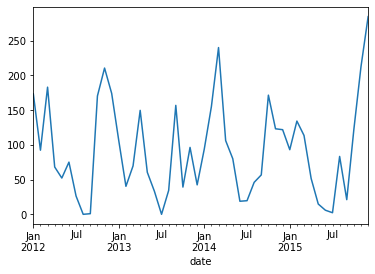

In [28]:
df.precipitation.resample('m').sum().plot()

In [29]:
# Which month has the most number of days with a non-zero amount of precipitation? not aggregated by month, look at year-month combination
rain = df[df.precipitation > 0 ]
rain.precipitation.resample('m').count().nlargest(3)

date
2012-12-31    27
2015-12-31    25
2012-01-31    22
Name: precipitation, dtype: int64

### Flights Dataset

In [30]:
fdf = data.flights_20k()

In [31]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [32]:
fdf.head(2)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP


In [33]:
fdf.set_index('date',inplace=True)

In [34]:
#Convert any negative delays to 0.
fdf.delay = np.where(fdf.delay < 0,0,fdf.delay)

<AxesSubplot:>

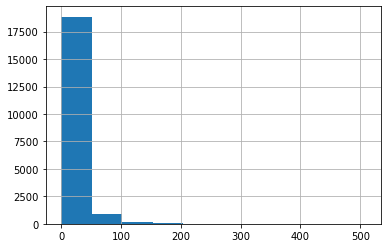

In [35]:
fdf.delay.hist()

In [39]:
#Which hour of the day has the highest average delay?
fdf['hour'] = fdf.index.hour
fdf.head()

,delay,distance,origin,destination,dayofweek,hour
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,5,14
2001-01-31 16:40:00,0,1093,FLL,ISP,2,16
2001-02-11 18:39:00,3,293,LBB,DAL,6,18
2001-01-10 21:00:00,0,550,MSY,MCO,2,21
2001-03-30 21:45:00,0,229,STL,IND,4,21


In [42]:
fdf.groupby('hour').mean()

,delay,distance,dayofweek
hour,,,
0,127.916667,424.583333,2.833333
1,170.000000,256.000000,4.000000
3,302.500000,322.000000,2.500000
5,0.513514,327.702703,2.162162
6,2.494856,448.913580,2.462963
7,3.071932,530.179126,2.791961
8,4.030483,558.536059,2.771747
9,5.002504,563.075125,2.878130
10,5.850953,513.748700,2.909012


In [41]:
fdf.groupby('hour').mean().nlargest(3,columns='delay')

,delay,distance,dayofweek
hour,,,
3,302.500000,322.000000,2.500000
1,170.000000,256.000000,4.000000
0,127.916667,424.583333,2.833333


In [45]:
#Does the day of the week make a difference in the delay amount?
fdf['dayofweek'] = fdf.index.day_of_week
fdf['weekday_name'] = fdf.index.day_name()

In [46]:
fdf.head(2)

,delay,distance,origin,destination,dayofweek,hour,weekday_name
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,5,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,2,16,Wednesday


<AxesSubplot:xlabel='weekday_name'>

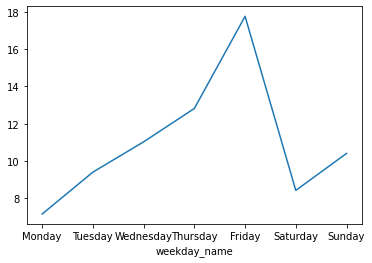

In [48]:
fdf.groupby('weekday_name').mean().sort_values('dayofweek').delay.plot()

<AxesSubplot:xlabel='month_name'>

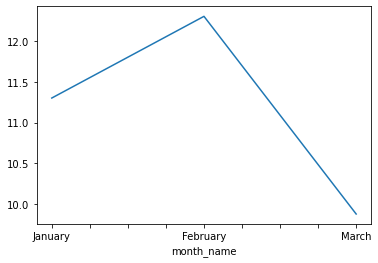

In [50]:
#Does the month make a difference in the delay amount?
fdf['month_name'] = fdf.index.month_name()
fdf['month'] = fdf.index.month
fdf.groupby('month_name').mean().sort_values('month').delay.plot()

In [51]:
fdf.month_name.value_counts()

March       6960
January     6784
February    6256
Name: month_name, dtype: int64

In [52]:
df2 = data.flights_20k()
df2

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [54]:
df2.date.dt.hour

0        14
1        16
2        18
3        21
4        21
         ..
19995    15
19996    13
19997    11
19998    16
19999    11
Name: date, Length: 20000, dtype: int64